In [3]:
%matplotlib inline
import autogluon.core as ag
from autogluon.vision import ImageDataset,ImagePredictor
import pandas as pd

/home/xherror/anaconda3/lib/python3.9/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.2+cu113` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [2]:
csv_file = ag.utils.download('https://autogluon.s3-us-west-2.amazonaws.com/datasets/petfinder_example.csv')
df = pd.read_csv(csv_file)
df.head()
#We use a csv file from PetFinder competition as an example. 
# You may use any tabular data as long as you can create image
# (absolute or relative paths to images) and label(category for each image) columns.
#

100%|██████████| 820/820 [00:00<00:00, 1005.91KB/s]


,image,PetID,label
0,petfinder_data/train_images/015da9e87-1.jpg,015da9e87,0
1,petfinder_data/train_images/022606901-1.jpg,022606901,0
2,petfinder_data/train_images/02f89bdcb-1.jpg,02f89bdcb,0
3,petfinder_data/train_images/03f217352-1.jpg,03f217352,0
4,petfinder_data/train_images/040a9a6f9-1.jpg,040a9a6f9,0


In [8]:
train_data, _, test_data = ImageDataset.from_folders('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip', train='train', test='test')
print('train #', len(train_data), 'test #', len(test_data))
train_data.head()

data/
├── test/
└── train/
train # 800 test # 80


,image,label
0,/home/xherror/.gluoncv/datasets/shopee-iet/dat...,0
1,/home/xherror/.gluoncv/datasets/shopee-iet/dat...,0
2,/home/xherror/.gluoncv/datasets/shopee-iet/dat...,0
3,/home/xherror/.gluoncv/datasets/shopee-iet/dat...,0
4,/home/xherror/.gluoncv/datasets/shopee-iet/dat...,0


In [15]:
train_dataset, _, test_dataset = ImageDataset.from_folders('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')
print(train_dataset)

data/
├── test/
└── train/
                                                 image  label
0    /home/xherror/.gluoncv/datasets/shopee-iet/dat...      0
1    /home/xherror/.gluoncv/datasets/shopee-iet/dat...      0
2    /home/xherror/.gluoncv/datasets/shopee-iet/dat...      0
3    /home/xherror/.gluoncv/datasets/shopee-iet/dat...      0
4    /home/xherror/.gluoncv/datasets/shopee-iet/dat...      0
..                                                 ...    ...
795  /home/xherror/.gluoncv/datasets/shopee-iet/dat...      3
796  /home/xherror/.gluoncv/datasets/shopee-iet/dat...      3
797  /home/xherror/.gluoncv/datasets/shopee-iet/dat...      3
798  /home/xherror/.gluoncv/datasets/shopee-iet/dat...      3
799  /home/xherror/.gluoncv/datasets/shopee-iet/dat...      3

[800 rows x 2 columns]


In [4]:
train_data, _, test_data = ImageDataset.from_folders('https://autogluon.s3.amazonaws.com/datasets/shopee-iet.zip')

data/
├── test/
└── train/


In [5]:
model = ag.Categorical('resnet18_v1b', 'mobilenetv3_small')

# you may choose more than 70+ available model in the model zoo provided by GluonCV:
model_list = ImagePredictor.list_models()

In [6]:
batch_size = 8
lr = ag.Categorical(1e-2, 1e-3)

Reset labels to [0, 1, 2, 3]
Randomly split train_data into train[720]/validation[80] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting HPO experiments
  0%|          | 0/2 [00:00<?, ?it/s]=============================================================================
In v0.5.0, ImagePredictor will no longer support training MXNet models. Please consider switching to specifying Torch models instead.
Users should ensure they update their code that depends on ImagePredictor when upgrading to future AutoGluon releases.
For more information, refer to this GitHub issue: https://github.com/awslabs/autogluon/issues/1560

modified configs(<old> != <new>): {
root.img_cls.model   resnet50_v1 != resnet18_v1b
root.train.early_stop_patience -1 != 10
root.train.rec_train ~/.mxnet/datasets/imagenet/rec/train.rec != auto
root.train.lr        0.1 != 0.01
root.train.early_stop_baseline 0.0 != -inf
root.train.batch_size 128 != 8
root.train.rec

42433KB [00:02, 16162.45KB/s]                           
Start training from [Epoch 0]
Epoch[0] Batch [49]	Speed: 12.750208 samples/sec	accuracy=0.357500	lr=0.010000
[Epoch 0] training: accuracy=0.425000
[Epoch 0] speed: 12 samples/sec	time cost: 56.978304
[Epoch 0] validation: top1=0.762500 top5=1.000000
[Epoch 0] Current best top-1: 0.762500 vs previous -inf, saved to /home/xherror/Repo/cs231n-exercise-assignment/assignment3/0f6b41cb/.trial_0/best_checkpoint.pkl
Epoch[1] Batch [49]	Speed: 12.395890 samples/sec	accuracy=0.562500	lr=0.010000
[Epoch 1] training: accuracy=0.583333
[Epoch 1] speed: 12 samples/sec	time cost: 58.249302
[Epoch 1] validation: top1=0.850000 top5=1.000000
[Epoch 1] Current best top-1: 0.850000 vs previous 0.762500, saved to /home/xherror/Repo/cs231n-exercise-assignment/assignment3/0f6b41cb/.trial_0/best_checkpoint.pkl
Applying the state from the best checkpoint...
[22:47:44] ../src/imperative/./imperative_utils.h:93: GPU support is disabled. Compile MXNet with 

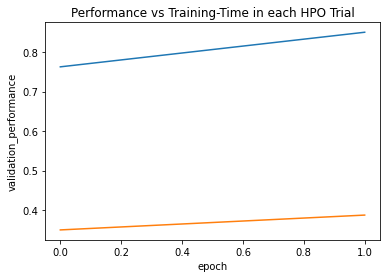

Finished, total runtime is 278.00 s
{ 'best_config': { 'estimator': <class 'gluoncv.auto.estimators.image_classification.image_classification.ImageClassificationEstimator'>,
                   'gpus': [0],
                   'img_cls': { 'batch_norm': False,
                                'last_gamma': False,
                                'model': 'resnet18_v1b',
                                'use_gn': False,
                                'use_pretrained': True,
                                'use_se': False},
                   'train': { 'batch_size': 8,
                              'crop_ratio': 0.875,
                              'data_dir': 'auto',
                              'dtype': 'float32',
                              'early_stop_baseline': -inf,
                              'early_stop_max_value': inf,
                              'early_stop_min_delta': 0.001,
                              'early_stop_patience': 10,
                              'epochs': 2,

Top-1 val acc: 0.388


In [7]:
hyperparameters={'model': model, 'batch_size': batch_size, 'lr': lr, 'epochs': 2}
predictor = ImagePredictor()
predictor.fit(train_data, time_limit=60*10, hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs={'num_trials': 2})
print('Top-1 val acc: %.3f' % predictor.fit_summary()['valid_acc'])

In [5]:
predictor = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
predictor.fit(train_dataset, hyperparameters={'epochs': 1})  # you can trust the default config, we reduce the # epoch to save some build time

`time_limit=auto` set to `time_limit=7200`.
Reset labels to [0, 1, 2, 3]
Randomly split train_data into train[720]/validation[80] splits.
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet50
root.train.batch_size 32 != 16
root.train.epochs    200 != 2
root.train.early_stop_max_value 1.0 != inf
root.train.early_stop_patience -1 != 10
root.train.early_stop_baseline 0.0 != -inf
root.misc.num_workers 4 != 8
root.misc.seed       42 != 199
}
Saved config to /home/xherror/Repo/cs231n-exercise-assignment/assignment3/56b6ea6e/.trial_0/config.yaml
No gpu detected, fallback to cpu. You can ignore this warning if this is intended.
Model resnet50 created, param count:                                         23516228
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accurac

In [6]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.517, val acc: 0.725


In [7]:
image_path = test_dataset.iloc[0]['image']
result = predictor.predict(image_path)
print(result)

0    1
Name: label, dtype: int64


In [8]:
proba = predictor.predict_proba(image_path)
print(proba)

          0         1         2         3
0  0.228553  0.296949  0.294802  0.179696


In [9]:
test_acc = predictor.evaluate(test_dataset)
print('Top-1 test acc: %.3f' % test_acc['top1'])

[Epoch 1] validation: top1=0.700000 top5=1.000000


Top-1 test acc: 0.700
